### Лабораторная работа "Уравнение теплопроводности" Кузнецова Светлана Б06-905 Вариант 8

Уравнение:
$$U_{t} = U_{xx}$$
$$U(x,0) = x\cdot e^{-x^{2}}$$
Точное решение:
$$U(x,t) = x\cdot (1+4t)^{-\frac{3}{2}}e^{\frac{-x^{2}}{1+4t}}$$
Зададим краевые условия при $$x \in [0;L]$$
$$U(0,t) = 0$$
$$U(L,t) = L\cdot (1+4t)^{-\frac{3}{2}}e^{\frac{-L^{2}}{1+4t}}$$

#### Двухслойная шеститочечная разностная схема

Разностная схема для нашего уравнения:
$$\frac{U^{n+1}_{m}-U^{n}_{m}}{\tau} = \xi \frac{U^{n+1}_{m+1} - 2U^{n+1}_{m} + U^{n+1}_{m-1}}{h^{2}} + (1-\xi) \frac{U^{n}_{m+1} - 2U^{n}_{m} + U^{n}_{m-1}}{h^{2}}$$
Зададим сетку:
$$D=[(t^{n}, x_{m}): t^{n} = n\tau, \tau N = T, n=0,...,N, x_{m} = mh, Mh = L, m=0,...,M]$$
Приведем подобрые в разностной схема для внутренней части:
$$\frac{-\xi}{h^{2}}U^{n+1}_{m+1} + (\frac{1}{\tau} + \frac{2\xi}{h^{2}})U^{n+1}_{m} + \frac{-\xi}{h^{2}}U^{n+1}_{m-1} = \frac{1-\xi}{h^{2}}U^{n}_{m+1} + (\frac{1}{\tau} - \frac{2(1-\xi)}{h^{2}})U^{n}_{m} + \frac{1-\xi}{h^{2}}U^{n}_{m-1}$$

Граница:
$$U^{n+1}_{0} = 0$$
$$U^{n+1}_{M} = L(1+4t^{n+1})^{-\frac{3}{2}}e^{\frac{-L^{2}}{1+4t^{n+1}}}$$
Разностная схема в матричном виде:
![jupyter](./pic.jpg)

Параболическое число Куранта:
$$\sigma = \frac{\tau a}{h^{2}} = \frac{\tau}{h^{2}}$$
Условие устойчивости:
$$\sigma <= \frac{1}{2}$$

План действий:
1) Решаем задачу при параметрах M = 7, L = 1, T = 1, N = 100, ksi = 0

2) Решаем задачу при параметрах M = 7, L = 1, T = 1, N = 100, ksi = 0.5

3) Решаем задачу при параметрах M = 7, L = 1, T = 1, N = 100, ksi = 1

4) Сравнить решения при разных значениях $\xi$

In [48]:
from functionslabwork import *

1) Решим задачу при параметрах: M = 7, L = 1, T = 1, N = 100, ksi = 0

In [49]:
Curant(100, 1, 1, 7)

Параболическое число Куранта 0.49000000000000005


Проверим, что при t = 0 графики численного и точного решений совпадают

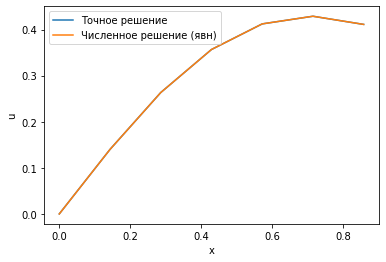

In [50]:
u_ex=u_exect(7, 100, 1, 1)[:, 0]
u_n = num_sol(7, 100, 1, 1, 0)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (явн)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график точного решения:

In [51]:
plot_3d(u_exect(7, 100, 1, 1))

Построим 3Д график численного решения:

In [52]:
plot_3d(num_sol(7, 100, 1, 1, 0))

Построим график невязки:

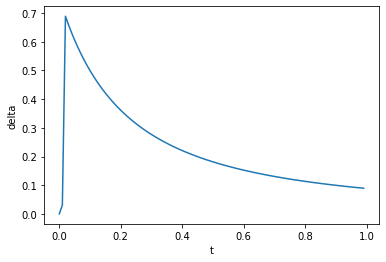

In [53]:
nev(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 0))

Вывод 1: Из графика невязки также видно, что в точке t = 0 решения совпадают. Так же заметим, что в точке, близкой к t = 0.05, невязка резко возрастает, после чего спадает. Несовпадение решений в точке, близкой к t = 0.05, также видно и из 3Д графиков решений. Численное решение резко падает практически до 0, в то время как точное решение делает это более плавно.

2) Решим задачу при параметрах: M = 7, L = 1, T = 1, N = 100, ksi = 0.5

In [54]:
Curant(100, 1, 1, 7)

Параболическое число Куранта 0.49000000000000005


Проверим, что при t = 0 графики численного и точного решений совпадают

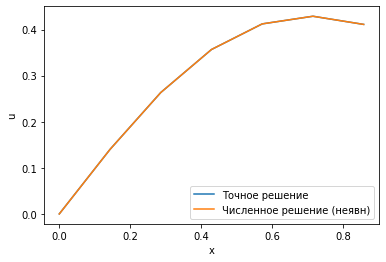

In [55]:
u_ex=u_exect(7, 100, 1, 1)[:, 0]
u_n = num_sol(7, 100, 1, 1, 0.5)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (неявн)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график точного решения:

In [56]:
plot_3d(u_exect(7, 100, 1, 1))

Построим 3Д график численного решения:

In [57]:
plot_3d(num_sol(7, 100, 1, 1, 0.5))

Построим график невязки:

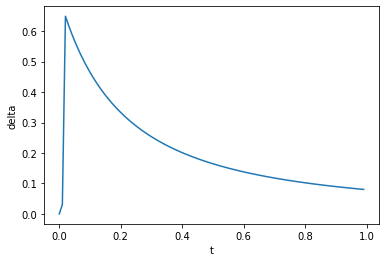

In [58]:
nev(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 0.5))

Вывод 2: Из графика невязки можно сделать вывод, аналогичный выводу 1. Однако, заметим, что максимальная невязка уменьшилась.

3) Решим задачу при параметрах: M = 7, L = 1, T = 1, N = 100, ksi = 1

In [59]:
Curant(100, 1, 1, 7)

Параболическое число Куранта 0.49000000000000005


Проверим, что при t = 0 графики численного и точного решений совпадают

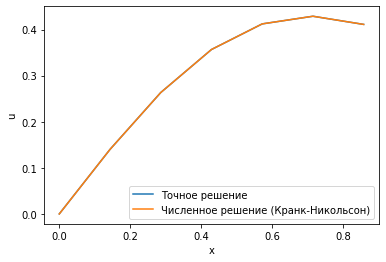

In [60]:
u_ex=u_exect(7, 100, 1, 1)[:, 0]
u_n = num_sol(7, 100, 1, 1, 1)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (Кранк-Никольсон)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график точного решения:

In [61]:
plot_3d(u_exect(7, 100, 1, 1))

Построим 3Д график численного решения:

In [62]:
plot_3d(num_sol(7, 100, 1, 1, 1))

Построим график невязки:

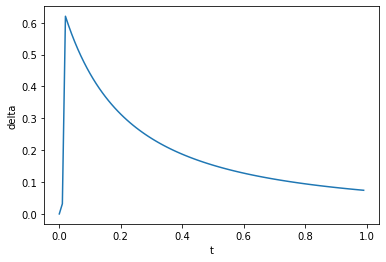

In [63]:
nev(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 1))

Вывод 3: Из полученных графиков можно сделать вывод, аналогичный 1 и 2.

4) Построим на одном графике все три невязки от времени для разных $\xi$:

In [87]:
nevs = [nev1(100,1, u_exect(7, 100, 1, 1),num_sol(7, 100, 1, 1, 1)), nev1(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 0)),nev1(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 1/2))]
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[0],
    name="ksi = 1"
))

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[1],
    name="ksi = 0"
))
fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[2],
    name="ksi = 0.5"
))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Delta')
fig.show()

Вывод 4: Заметим что невязки для всех $\xi$ вначале совпадают. Однако их максмальные значения разные, хотя и достигаются в одной точке приблизительно $ t = 0.28$. Самое большое масимальное значение невязки у явной схемы, после нее идет схема Кранка–Никольсона, самым маленьким значением в точке максимума обладает неявная схема.

5) Построим численное решение для схемы Кранка Никольсона при другом разбиении сетки: M = 7, L = 1, T = 1, N = 200, ksi = 0.5

In [65]:
Curant(300, 1, 1, 7)

Параболическое число Куранта 0.16333333333333336


Проверим, что при t = 0 графики численного и точного решений совпадают

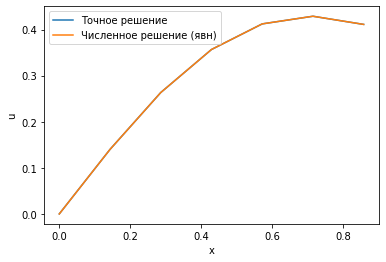

In [66]:
u_ex=u_exect(7, 300, 1, 1)[:, 0]
u_n = num_sol(7, 300, 1, 1, 1)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (явн)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график точного решения:

In [67]:
plot_3d(u_exect(7, 300, 1, 1))

Построим 3Д график численного решения:

In [68]:
plot_3d(num_sol(7, 300, 1, 1, 0.5))

Построим график невязки:

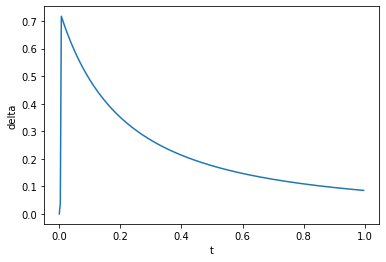

In [69]:
nev(300,1, u_exect(7, 300, 1, 1) ,num_sol(7, 300, 1, 1, 0.5))

Построим на одном графике невязки от времени для разбиений, отличающихся только N (100 и 200) при $\xi = 0.5$:

In [91]:
nevs = [nev1(300,1, u_exect(7, 300, 1, 1),num_sol(7, 300, 1, 1, 1)), nev1(100,1, u_exect(7, 100, 1, 1) ,num_sol(7, 100, 1, 1, 0))]
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/300)],
    y = nevs[0],
    name="N = 300"
))

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[1],
    name="N = 100"
))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Delta')
fig.show()

Вывод 5: При уменьшении разбиения невязка уменьшается

#### Метод прямых

Уравнение:
$$U_{t} = U_{xx}$$
$$U(x,0) = x\cdot e^{-x^{2}}$$
Точное решение:
$$U(x,t) = x\cdot (1+4t)^{-\frac{3}{2}}e^{\frac{-x^{2}}{1+4t}}$$
Зададим краевые условия при $$x \in [0;L]$$
$$U(0,t) = 0 = \phi_{0}$$
$$U(L,t) = L\cdot (1+4t)^{-\frac{3}{2}}e^{\frac{-L^{2}}{1+4t}} = \phi_{1}$$

Зададим сетку:
$$D=[(t^{n}, x_{m}): t^{n} = n\tau, \tau N = T, n=0,...,N, x_{m} = mh, Mh = L, m=0,...,M]$$

1) Решим задачу при параметрах: M = 7, L = 1, T = 1, N = 100 и M = 7, L = 1, T = 1, N = 200

Зададим производную:

In [71]:
from functionslabwork import *

In [72]:
def func_du(t, u):
    L = 1
    M = 7
    h = L/M
    du = [0 for i in range(M)]
    du[1]=(0- 2*u[2]+u[3])/h**2
    for m in range(2, M-2):
        du[m] = (u[m-1]-2*u[m]+u[m+1])/h**2
    du[M-2]=(u[M-3]-2*u[M-2]+L*(1+4*t)**(-3/2)*np.exp(-L**2/(1+4*t)))/h**2
    du[M-1]=((4*L**3)*np.exp(-L**2/(1+4*t)))/(1+4*t)**(7/2) - (6*L*np.exp(-L**2/(1+4*t)))/(1+4*t)**(5/2)
    return(du)

In [73]:
def numer_sol(T, L, M, N):
    h = L/M
    tau = T/N
    t = np.arange(0, T, tau)
    x = np.arange(0, L, h)
    
    ut = np.zeros(M)
    for m in range(M): 
        ut[m] = x[m]*np.exp(-(x[m])**2)

    r = scipy.integrate.ode(func_du).set_integrator("dopri5")  #runge-kutta method of order (4)5
    r.set_initial_value(ut, 0)

    y = np.zeros((M, len(t)))
    for i in range(1, len(t)):
        y[:, i] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")
    for m in range(M): 
        y[m][0] = x[m]*np.exp(-(x[m])**2)
    
    return y

Проверим, что при t = 0 графики численного и точного решений совпадают

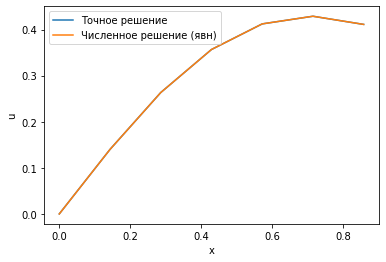

In [74]:
u_ex=u_exect(7, 100, 1, 1)[:, 0]
u_n = numer_sol(1, 1, 7, 100)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (явн)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график численного решения:

In [75]:
plot_3d(numer_sol(1, 1, 7, 100))

Построим 3Д график точного решения:

In [76]:
plot_3d(u_exect(7, 100, 1, 1))

Построим график невязки:

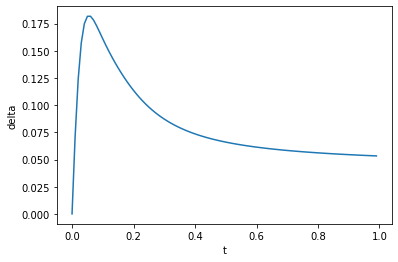

In [77]:
nev(100,1, u_exect(7, 100, 1, 1) ,numer_sol(1, 1, 7, 100))

M = 7, L = 1, T = 1, N = 200

Проверим, что при t = 0 графики численного и точного решений совпадают

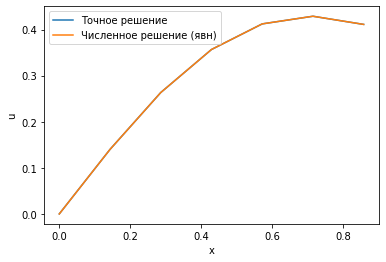

In [78]:
u_ex=u_exect(7, 200, 1, 1)[:, 0]
u_n = numer_sol(1, 1, 7, 200)[:, 0]
x = [i for i in np.arange(0, 1, 1/7)]
plt.plot(x, u_ex, label = "Точное решение")
plt.plot(x, u_n, label = "Численное решение (явн)")
plt.xlabel('x')
plt.ylabel('u')
plt.legend(fontsize = 10)
plt.show()

Решения совпали. Значит, вероятно, мы правильно завели наш численный метод

Построим 3Д график численного решения:

In [79]:
plot_3d(numer_sol(1, 1, 7, 200))

Построим 3Д график точного решения:

In [80]:
plot_3d(u_exect(7, 200, 1, 1))

Построим график невязки:

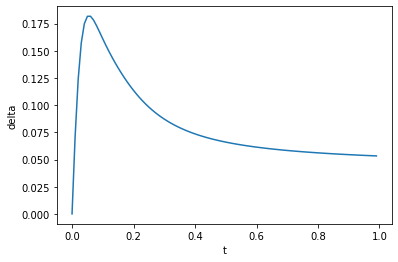

In [81]:
nev(100,1, u_exect(7, 100, 1, 1) ,numer_sol(1, 1, 7, 100))

Построим на одном графике невязки от времени для разбиений, отличающихся только N (100 и 200):

In [99]:
nevs = [nev1(200,1, u_exect(7, 200, 1, 1),numer_sol(1, 1, 7, 200)), nev1(100,1, u_exect(7, 100, 1, 1) ,numer_sol(1, 1, 7, 100))]
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/200)],
    y = nevs[0],
    name="N = 200"
))

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[1],
    name="N = 100"
))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Delta')
fig.show()

Вывод 1: При уменьшении разбиения невязка должна уменьшаться. Здесь невязки совпадают.

2) Решим систему другим методом:

Real-valued Variable-coefficient Ordinary Differential Equation solver, with fixed-leading-coefficient implementation. It provides automatic method switching between implicit Adams method (for non-stiff problems) and a method based on backward differentiation formulas (BDF) (for stiff problems).

In [83]:
def numer_sol2(T, L, M, N):
    h = L/M
    tau = T/N
    t = np.arange(0, T, tau)
    x = np.arange(0, L, h)
    
    ut = np.zeros(M)
    for m in range(M): 
        ut[m] = x[m]*np.exp(-(x[m])**2)

    r = scipy.integrate.ode(func_du).set_integrator("Isoda") 
    r.set_initial_value(ut, 0)

    y = np.zeros((M, len(t)))
    for i in range(1, len(t)):
        y[:, i] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")
    for m in range(M): 
        y[m][0] = x[m]*np.exp(-(x[m])**2)
    
    return y

In [84]:
plot_3d(numer_sol2(1, 1, 7, 100))

C:\Users\Admin\miniconda3\lib\site-packages\scipy\integrate\_ode.py:389: UserWarning:

No integrator name match with 'Isoda' or is not available.



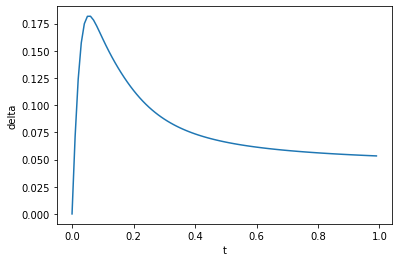

In [85]:
nev(100,1, u_exect(7, 100, 1, 1) ,numer_sol2(1, 1, 7, 100))

In [100]:
nevs = [nev1(100,1, u_exect(7, 100, 1, 1),numer_sol(1, 1, 7, 100)), nev1(100,1, u_exect(7, 100, 1, 1) ,numer_sol2(1, 1, 7, 100))]
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[0],
    name="dopri5"
))

fig.add_trace(go.Scatter(
    x = [i for i in np.arange(0, 1, 1/100)],
    y = nevs[1],
    name="Isoda"
))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Delta')
fig.show()

Вывод 2: Из последнего графика видно, что метод Isoda и Runge-Kutta 5(4) имеют одинаковые графики невзяки при данном разбиении и при данной задаче. Найти методы, встроенные в Питон (решатели), которые бы сильно отличались- не удалось. Нашла еще РК(8), но в сравнении с 5(4) график выглядит аналогично.